In [1]:
import sys
sys.path.append("..") ## resetting the path to the parent directory

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
raw_df = pd.read_csv('../data/coin_metadata.csv')
df = pd.read_csv('../data/cleaned_data.csv')

In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
def year_converter(year_string):
    
    year_string = str(year_string)
    
    split_string = year_string.split(' ')
    
    if len(split_string) > 1:
        if 'AD' in split_string:
            idx = split_string.index('AD')
            year = int(split_string[len(split_string) - 1 - idx])
        elif 'BC' in split_string:
            idx = split_string.index('BC')
            year = int('-' + split_string[len(split_string) - 1 - idx])
    else:
        if year_string == 'nan':
            year = None
        else:
            year = int(year_string)
    return year

In [6]:
# ## From Min
# def fill_year_na(df):
#     avg_year = df.groupby('portrait').agg({'year': 'mean'}).reset_index()
#     na_mask = df['year'].isna()
#     df_masked = df[na_mask]
#     for i in df_masked.index:
#         portrait = df_masked.loc[i, 'portrait']
#         if portrait in avg_year['portrait'].values:
#             avg = avg_year.loc[avg_year['portrait'] == portrait, 'year'].values[0]
#             df_masked.loc[i, 'year'] = avg
#         else:
#             df_masked.loc[i, 'year'] = avg_year['year'].mean()
#     return df_masked

In [7]:
#df['year'] = df['year'].apply(lambda x: year_converter(x))

In [8]:
#df['year'] = df['year'].fillna(df.groupby('portrait')['year'].transform('mean').round())

## Finalized df to workwith
### At least 1000 portraits to train the model

In [9]:
#df_target = df[df.groupby('portrait')['portrait'].transform('size') > 1000]

In [10]:
# size = df_target.portrait.value_counts().min()        # sample size
# replace = False  # with replacement
# fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
# balanced_df = df_target.groupby('portrait', as_index=False).apply(fn)

In [11]:
#balanced_df.to_csv('../data/balanced_df.csv')

# Images and graphs

## Before balancing data

In [12]:
df_target=df

In [13]:
df_target['portrait'].value_counts()

Trajan             1055
Constantius II     1055
Hadrian            1055
Diocletian         1055
Maximian           1055
Constantine II     1055
Antoninus Pius     1055
Gallienus          1055
Constantine I      1055
Marcus Aurelius    1055
Licinius           1055
Galerius           1055
Name: portrait, dtype: int64

In [14]:
raw_df.portrait.nunique()

247

In [15]:
df_target['portrait'].value_counts().index

Index(['Trajan', 'Constantius II', 'Hadrian', 'Diocletian', 'Maximian',
       'Constantine II', 'Antoninus Pius', 'Gallienus', 'Constantine I',
       'Marcus Aurelius', 'Licinius', 'Galerius'],
      dtype='object')

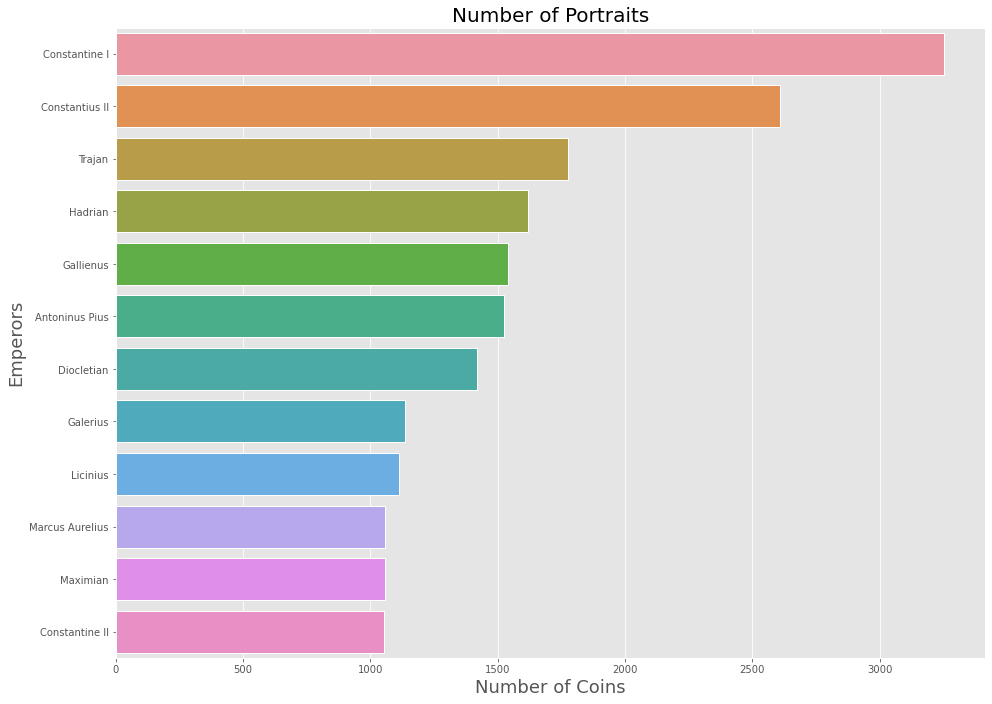

In [16]:
df_temp = raw_df[raw_df.groupby('portrait')['portrait'].transform('size')>1000]

fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
#pal1 = sns.color_palette('spectral')
sns.barplot(y = df_temp['portrait'].value_counts().index, 
            x = df_temp['portrait'].value_counts(),
            ax = ax);
ax.set_title('Number of Portraits',fontsize=20)
ax.set_ylabel('Emperors',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
ax.set
plt.tight_layout()

## Examining Balanced Data

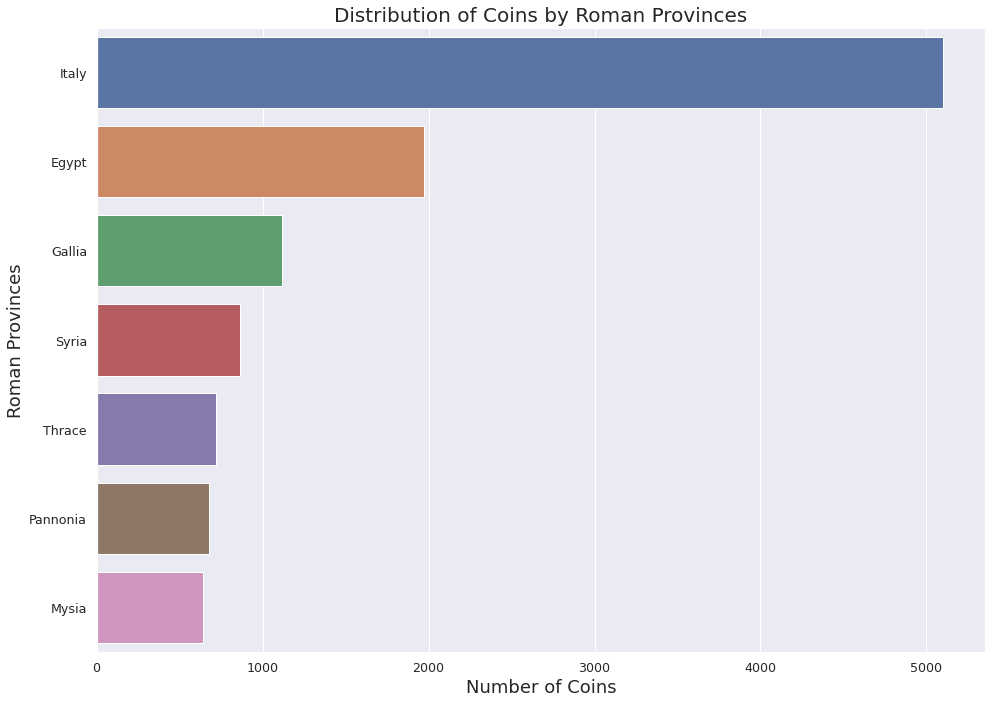

In [17]:
#df_temp = df_target[df_target.groupby('region')['region'].transform('size')>250]
df_temp = df_target[df_target.groupby('region')['region'].transform('size')>500]
fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['region'].value_counts().index,
            x = df_temp['region'].value_counts(),
            ax = ax);
ax.set_title('Distribution of Coins by Roman Provinces',fontsize=20)
ax.set_ylabel('Roman Provinces',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
plt.tight_layout()

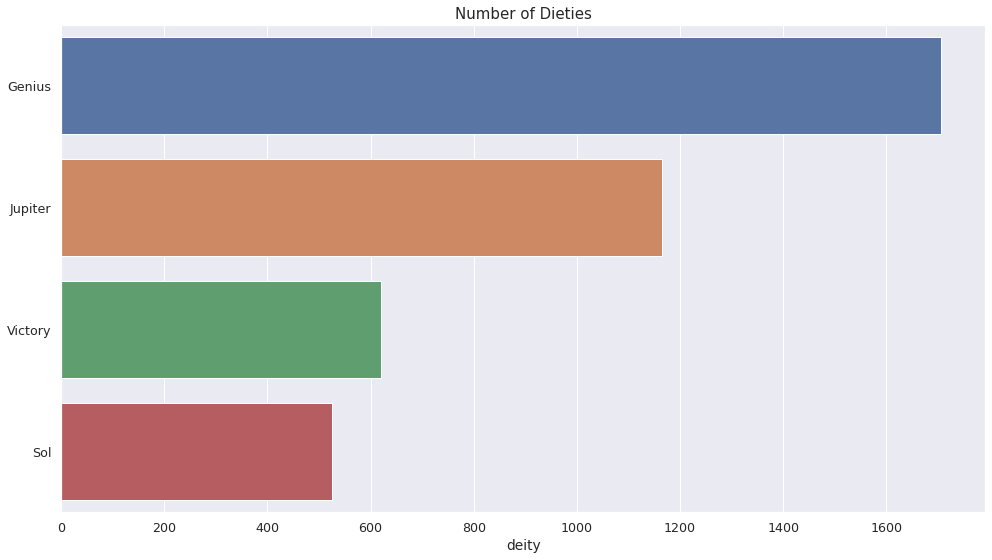

In [18]:
df_temp = df_target[df_target.groupby('deity')['deity'].transform('size')>500]

fig,ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['deity'].value_counts().index,
            x = df_temp['deity'].value_counts(),
            ax = ax);
ax.set_title('Number of Dieties',fontsize=15)
plt.tight_layout()

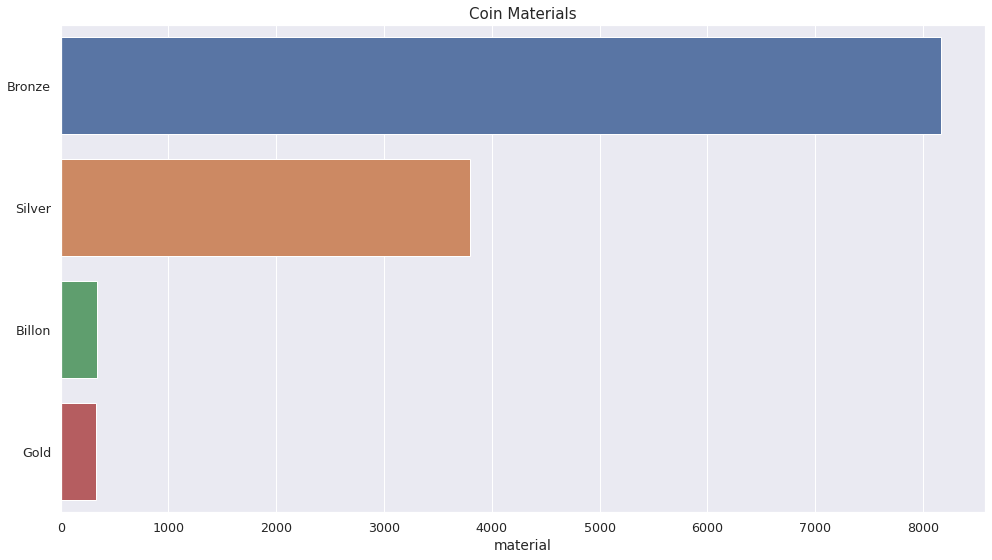

In [19]:
#df_temp = df_target[df_target.groupby('deity')['deity'].transform('size')>250]
df_temp = df_target[df_target.groupby('material')['material'].transform('size')>200]

fig,ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['material'].value_counts().index,
            x = df_temp['material'].value_counts(),
            ax = ax);
ax.set_title('Coin Materials',fontsize=15)
plt.tight_layout()

In [20]:
df_target.groupby('denomination')['material'].describe().sort_values('count',ascending=False)

,count,unique,top,freq
denomination,,,,
AE3,3414,2,Bronze,3401
Denarius,1849,2,Silver,1847
Antoninianus,1619,2,Silver,1617
AE1,1591,1,Bronze,1591
AE2,702,2,Bronze,698
Sestertius,626,2,Bronze,624
Drachm,619,2,Bronze,591
Tetradrachm,349,4,Billon,331
As,303,1,Bronze,303


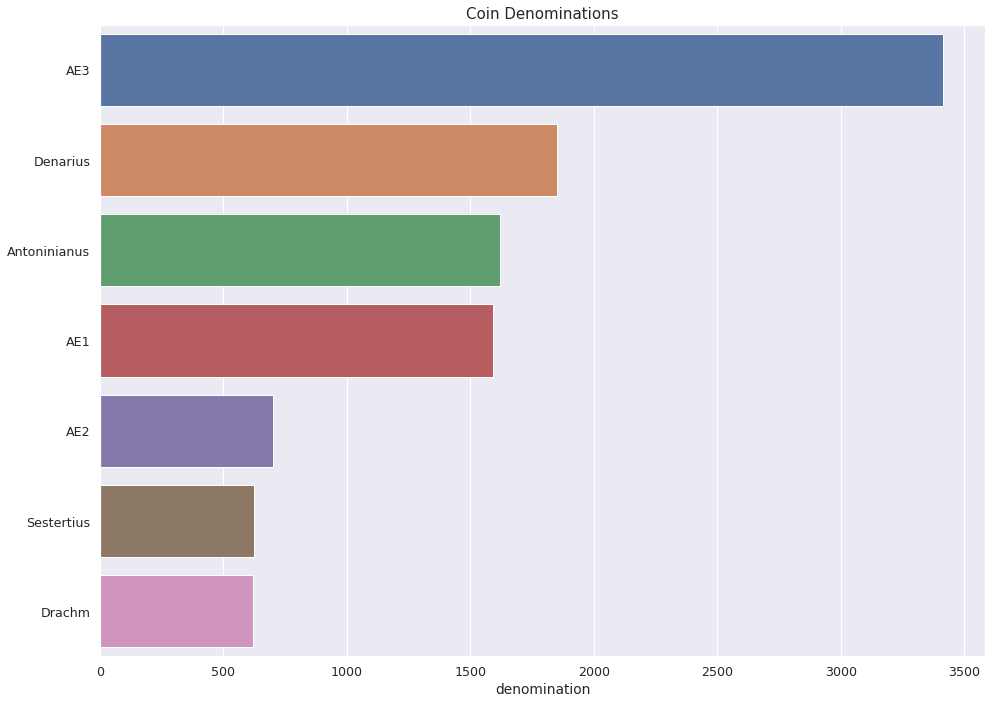

In [21]:
df_temp = df_target[df_target.groupby('denomination')['denomination'].transform('size')>500]

fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['denomination'].value_counts().index,
            x = df_temp['denomination'].value_counts(),
            ax = ax);
ax.set_title('Coin Denominations',fontsize=15)

# _, ylabels = plt.yticks()
# a.set_yticklabels(ylabels, size=15)

# _, xlabels = plt.xticks()
# a.set_xticklabels(xlabels, size=15)

# ax.set_ylabel('Years',fontsize=15)
# ax.set_xlabel('Number of Coins',fontsize=15)

# ax.set_xticklabels([0,1000,2000,3000,4000,5000,6000,7000],fontsize=15)
# ax.set_title('Denominations over Time',fontsize=15)
plt.tight_layout()

In [22]:
df_target.groupby('portrait')['denomination'].value_counts()

portrait        denomination    
Antoninus Pius  Denarius            359
                Drachm              251
                Sestertius          168
                As                   76
                Aureus               60
                                   ... 
Trajan          Antoninianus          1
                Obol                  1
                Quinarius aureus      1
                Semis                 1
                denarius              1
Name: denomination, Length: 154, dtype: int64

In [23]:
bins = [50, 100, 150, 200, 250, 300, 350, 400]
bin_labels = ['51-100','101-150','151-200','201-250','251-300','301-350', '351+']
df_target['years_bins'] = pd.cut(df_target['year'],bins = bins, labels=bin_labels,include_lowest=True)

#df_target.insert(-1,'year_bins',years)

In [24]:
df_temp = df_target[df_target.groupby('denomination')['denomination'].transform('size')>250]
denominations_df = pd.DataFrame(df_temp.groupby('years_bins')['denomination'].value_counts())

In [25]:
denominations_df.columns = ['counts']

In [26]:
denominations_df.reset_index(inplace=True)

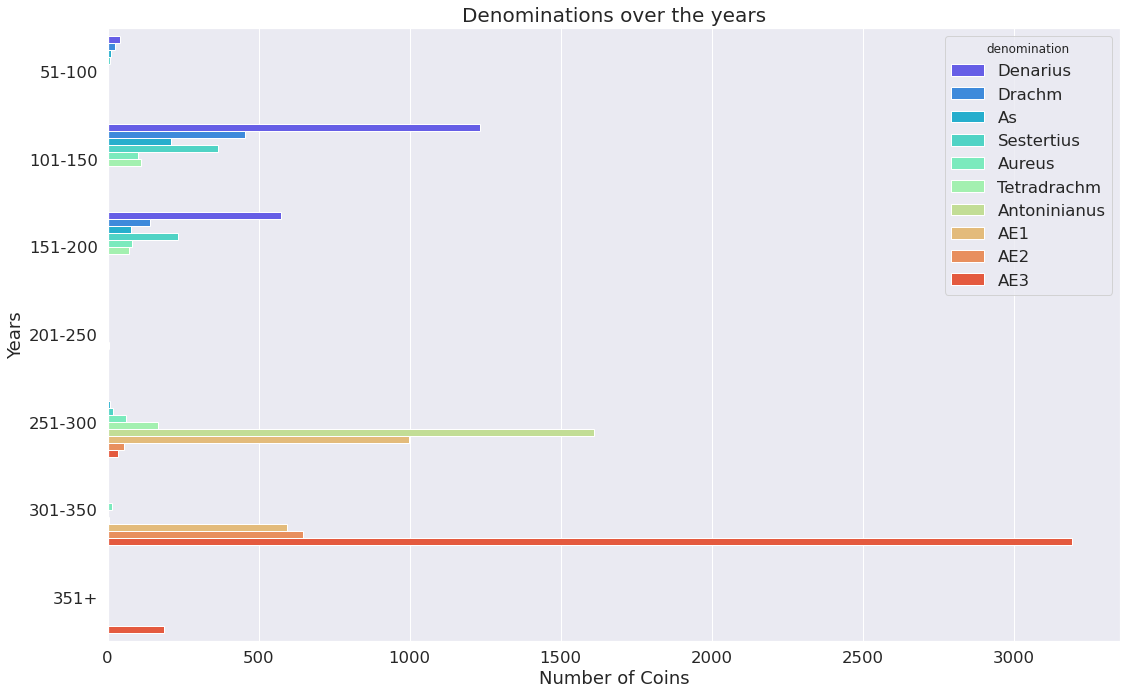

In [28]:
fig,ax = plt.subplots(figsize=(16,10))
sns.set(font_scale = 1.5)
a = sns.barplot(y=denominations_df['years_bins'],
            x=denominations_df['counts'],
            hue=denominations_df['denomination'],
            ax=ax,
               palette='rainbow');

ax.set_title('Denominations over the years', fontsize=20)
ax.set_ylabel('Years',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
#plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.tight_layout()

plt.savefig('../data/graphs/denom_hist2.png')

In [75]:
from PIL import Image

highest = '../imgs/train_folder/Gallienus/Gallienus_Gallienus_1590973417.9082742.jpg'
lowest = '../imgs/train_folder/Galerius/Galerius_Galerius_1590968811.5316548.jpg'
lowest2 = '../imgs/train_folder/Galerius/Maximian_Galerius_1590974738.6625881.jpg'

([], <a list of 0 Text major ticklabel objects>)

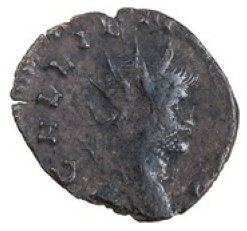

In [104]:
highest_gallienus = Image.open(highest)
lowest_galerius = Image.open(lowest)
lowest_galerius2 = Image.open(lowest2)
plt.imshow(highest_gallienus)
plt.xticks([])
plt.yticks([])

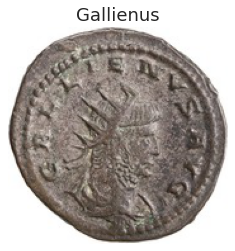

In [157]:
highest_gallienus2 = '../imgs/holdout_folder/Gallienus/Gallienus_Gallienus_1590973607.5284529.jpg'

highest_gallienus2 = Image.open(highest_gallienus2)


plt.imshow(highest_gallienus2)
plt.xticks([])
plt.yticks([])
plt.title('Gallienus',fontsize=18);

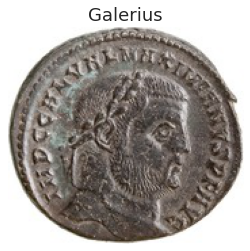

In [158]:
plt.imshow(lowest_galerius)
plt.xticks([])
plt.yticks([])
plt.title('Galerius',fontsize=18);

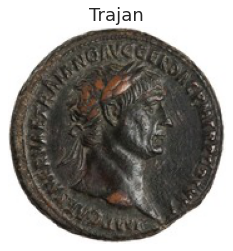

In [159]:
trajan2 = '../imgs/holdout_folder/Trajan/Trajan_Trajan_1590971492.4210715.jpg'

trajan2 = Image.open(trajan2)

plt.imshow(trajan2)
plt.xticks([])
plt.yticks([])
plt.title('Trajan',fontsize=18);

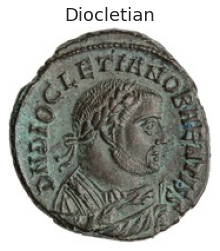

In [160]:
dio = '../imgs/holdout_folder/Diocletian/Maximinus Daia_Diocletian_1590966597.758258.jpg'

dio = Image.open(dio)

plt.imshow(dio)
plt.xticks([])
plt.yticks([])
plt.title('Diocletian',fontsize=18);

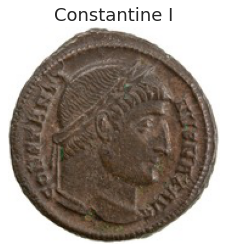

In [154]:
constantine1 = '../imgs/holdout_folder/Constantine I/Constantine I_Constantine I_1590964507.9052398.jpg'

constantine1 = Image.open(constantine1)

plt.imshow(constantine1)
plt.xticks([])
plt.yticks([])
plt.title('Constantine I', fontsize=18);

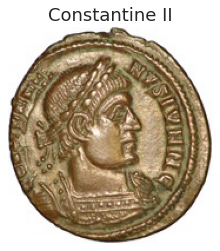

In [155]:
constantine2 = '../imgs/holdout_folder/Constantine II/Constantine I_Constantine II_1590966820.1396053.jpg'

constantine2 = Image.open(constantine2)

plt.imshow(constantine2)
plt.xticks([])
plt.yticks([])
plt.title('Constantine II',fontsize=18);

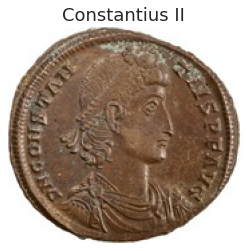

In [156]:
constantius2 = '../imgs/holdout_folder/Constantius II/Constantius II_Constantius II_1590966002.0561593.jpg'

constantius2 = Image.open(constantius2)

plt.imshow(constantius2)
plt.xticks([])
plt.yticks([])
plt.title('Constantius II', fontsize=18);